## 2. 데이터 전처리의 전략

### 결측치 처리하기: 드롭과 채우기

In [1]:
import pandas as pd
import numpy as np

raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
            'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
            'age': [42, np.nan, 36, 24, 73],
            'sex': ['m', np.nan, 'f', 'm', 'f'],
            'preTestScore': [4, np.nan, np.nan, 2, 3],
            'postTestScore': [25, np.nan, np.nan, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [2]:
df.isnull().sum()/len(df)

first_name       0.2
last_name        0.2
age              0.2
sex              0.2
preTestScore     0.4
postTestScore    0.4
dtype: float64

#### 1.1 드롭

In [3]:
df.dropna()

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [4]:
df_no_missing = df.dropna()
df_no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [5]:
df_cleaned = df.dropna(how='all')
df_cleaned

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [6]:
df['location'] = np.nan 
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [7]:
df.dropna(axis=1, how='all')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [9]:
df.dropna(axis=0, thresh=1)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [11]:
df.dropna(thresh=5)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


#### 1.2 채우기

In [12]:
df.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,0.0
1,0,0,0.0,0,0.0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0,0.0
4,Amy,Cooze,73.0,f,3.0,70.0,0.0


In [13]:
df['preTestScore'].fillna(df['preTestScore'].mean(), inplace=True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [14]:
df.groupby('sex')['postTestScore'].transform('mean')

0    43.5
1     NaN
2    70.0
3    43.5
4    70.0
Name: postTestScore, dtype: float64

In [15]:
df['postTestScore'].fillna(df.groupby('sex')['postTestScore'].transform('mean'), inplace=True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,70.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


### 2. 범주형 데이터 처리하기: 원핫인코딩

In [16]:
edges = pd.DataFrame({'source':[0, 1, 2],
                     'target': [2, 2, 3],
                     'weight': [3, 4, 5],
                     'color': ['red', 'blue', 'blue']})
edges

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [17]:
edges.dtypes

source     int64
target     int64
weight     int64
color     object
dtype: object

In [18]:
pd.get_dummies(edges)

,source,target,weight,color_blue,color_red
0,0,2,3,0,1
1,1,2,4,1,0
2,2,3,5,1,0


In [19]:
pd.get_dummies(edges['color'])

,blue,red
0,0,1
1,1,0
2,1,0


In [20]:
pd.get_dummies(edges[['color']])

,color_blue,color_red
0,0,1
1,1,0
2,1,0


In [21]:
weight_dict = {3: "M", 4:"L", 5:"XL"}
edges['weight_sign'] = edges['weight'].map(weight_dict)
weight_sign = pd.get_dummies(edges['weight_sign'])
weight_sign

,L,M,XL
0,0,1,0
1,1,0,0
2,0,0,1


In [22]:
pd.concat([edges, weight_sign], axis=1)

,source,target,weight,color,weight_sign,L,M,XL
0,0,2,3,red,M,0,1,0
1,1,2,4,blue,L,1,0,0
2,2,3,5,blue,XL,0,0,1


### 3. 바인딩

In [23]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts',
                         'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd'],
            'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
            'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

df = pd.DataFrame(raw_data)
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [25]:
bins = [0, 25, 50, 75, 100] # bins 정의(0-25, 25-50, 60-75, 75-100)
group_names = ['Low', 'Okay', 'Good', 'Great']
categories = pd.cut(
    df['postTestScore'], bins, labels=group_names)
categories

0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: postTestScore, dtype: category
Categories (4, object): ['Low' < 'Okay' < 'Good' < 'Great']

### 4. 데이터의 크기 맞추기: 피쳐 스케일링

In [26]:
df = pd.DataFrame(
    {'A': [14.00, 90.20, 90.95, 96.27, 91.21],
     'B': [103.02, 107.26, 110.35, 114.23, 114.68],
     'C': ['big', 'small', 'big', 'small', 'small']}
)
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [28]:
df.info

<bound method DataFrame.info of        A       B      C
0  14.00  103.02    big
1  90.20  107.26  small
2  90.95  110.35    big
3  96.27  114.23  small
4  91.21  114.68  small>

In [29]:
df.describe

<bound method NDFrame.describe of        A       B      C
0  14.00  103.02    big
1  90.20  107.26  small
2  90.95  110.35    big
3  96.27  114.23  small
4  91.21  114.68  small>

In [30]:
df['A']

0    14.00
1    90.20
2    90.95
3    96.27
4    91.21
Name: A, dtype: float64

In [31]:
df['B']

0    103.02
1    107.26
2    110.35
3    114.23
4    114.68
Name: B, dtype: float64

In [32]:
df['C']

0      big
1    small
2      big
3    small
4    small
Name: C, dtype: object

In [36]:
df['A'] - df['A'].min()

0     0.00
1    76.20
2    76.95
3    82.27
4    77.21
Name: A, dtype: float64

In [37]:
(df['A'] - df['A'].min() ) / (df['A'].max() - df['A'].min())

0    0.000000
1    0.926219
2    0.935335
3    1.000000
4    0.938495
Name: A, dtype: float64

In [38]:
(df['B'] - df['B'].mean()) / (df['B'].std())

0   -1.405250
1   -0.540230
2    0.090174
3    0.881749
4    0.973556
Name: B, dtype: float64

## 3. 데이터 전처리 실습

In [40]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

import seaborn as sns 
sns.set(style='whitegrid', color_codes=True)

DATA_DIR = '../datasets/ch06'
os.listdir(DATA_DIR)

['test.csv', 'train.csv']

In [43]:
data_files = sorted([os.path.join(DATA_DIR, filename) 
                     for filename in os.listdir(DATA_DIR)], reverse=True)
data_files

['../datasets/ch06/train.csv', '../datasets/ch06/test.csv']

In [48]:
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))

df = pd.concat(df_list, sort=False)

df= df.reset_index(drop=True)

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
number_of_train_dataset = df.Survived.notnull().sum()

number_of_test_dataset = df.Survived.isnull().sum()

y_true = df.pop('Survived')[:number_of_train_dataset]

#### 2.4 데이터 노트 작성하기

In [50]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [55]:
df.head(2).T

,0,1
PassengerId,1,2
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22.0,38.0
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833
Cabin,NaN,C85


#### 2.5 결측치 확인하기

In [56]:
pd.options.display.float_format = '{:.2f}'.format

df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age           20.09
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [57]:
df[df['Age'].notnull()].groupby(['Sex'])['Age'].mean()

Sex
female   28.69
male     30.59
Name: Age, dtype: float64

In [58]:
df[df['Age'].notnull()].groupby(['Pclass'])['Age'].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [59]:
df['Age'].fillna(
    df.groupby('Pclass')['Age'].transform('mean'), inplace = True
)

df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [60]:
df.loc[61, 'Embarked'] = 'S'
df.loc[829, 'Embarked'] = 'S'

#### 2.6 범주형 데이터 처리: 원핫인코딩

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [82]:
object_columns = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numeric_columns = ['Age', 'SibSp', 'Parch', 'Fare']

for col_name in object_columns:
    df[col_name] = df[col_name].astype(object)
    
for col_name in numeric_columns:
    df[col_name] = df[col_name].astype(float)
    
df['Parch'] = df['Parch'].astype(int)
df['SibSp'] = df['SibSp'].astype(int)

In [83]:
def merge_and_get(ldf, rdf, on, how='inner', index=None):
    if index is True:
        return pd.merge(ldf, rdf, how=how, left_index=True, right_index=True)
    else:
        return pd.merge(ldf, rdf, how=how, on=on)

In [86]:
one_hot_df = merge_and_get(
    df, pd.get_dummies(df['Sex'], prefix='Sex'), on=None, index=True)
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df['Pclass'], prefix='Pclass'), on=None, index=True)
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df['Embarked'], prefix='Embarked'), on=None, index=True)

/Users/seunghoonyang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


#### 2.7 데이터 시각화

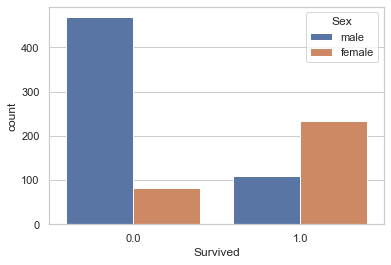

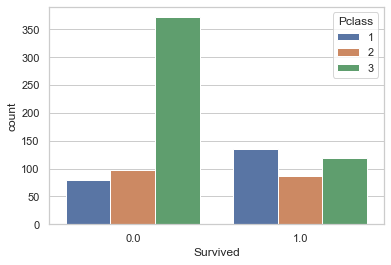

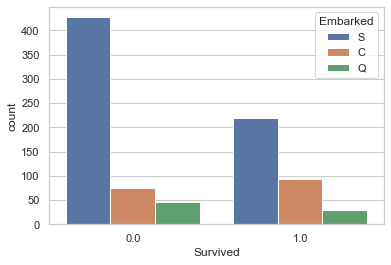

In [68]:
temp_columns = ['Sex', 'Pclass', 'Embarked']

for col_name in temp_columns:
    temp_df = pd.merge(
        one_hot_df[col_name], y_true, left_index=True, right_index=True)
    sns.countplot(x='Survived', hue=col_name, data=temp_df)
    plt.show()

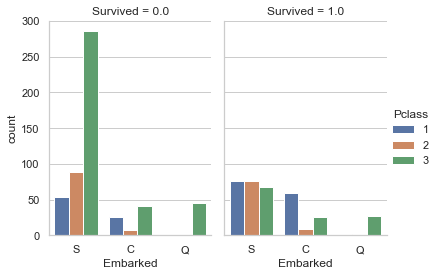

In [69]:
temp_df = pd.merge(one_hot_df[temp_columns],
                   y_true, left_index=True,
                   right_index=True)

g = sns.catplot(x='Embarked',
                hue='Pclass',
                col='Survived',
                data=temp_df,
                kind='count',
                height=4, aspect=.7);

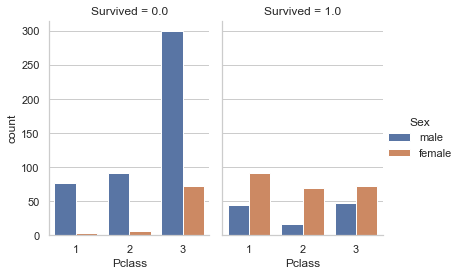

In [71]:
temp_df = pd.merge(
    one_hot_df[temp_columns],
    y_true, left_index=True,
    right_index=True)

g = sns.catplot(x="Pclass",
                hue = "Sex", col="Survived",
                data=temp_df, kind="count", height=4, aspect=.7)

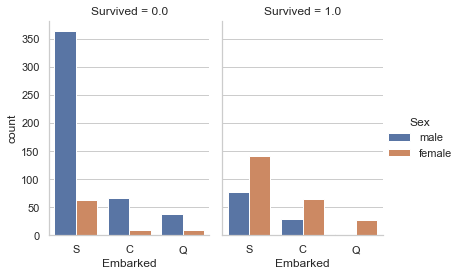

In [72]:
temp_df = pd.merge(
    one_hot_df[temp_columns],
    y_true, left_index=True,
    right_index=True)

g = sns.catplot(x="Embarked",
                hue = "Sex", col="Survived",
                data=temp_df, kind="count", height=4, aspect=.7)

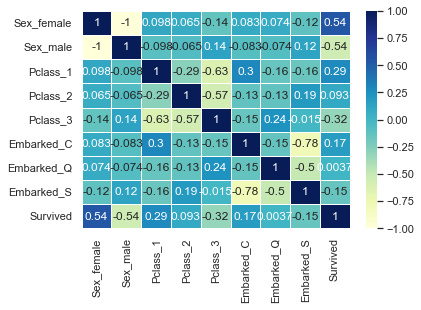

In [88]:
crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist()
                      if col_name.split("_")[0] in temp_columns and "_" in col_name] + ['Sex']

temp_df = pd.merge(one_hot_df[crosscheck_columns], y_true,
                   left_index=True, right_index=True)

corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True, linewidths=.5, cmap='YlGnBu')